<a href="https://colab.research.google.com/github/jafararalikhan/Sales_Profit_Analysis_Assignment-for-Business-Analyst-/blob/main/Assignment_for_Business_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q.1 Part: 1**

# Importing the Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the Dataset

orders = pd.read_csv('/content/8F1515F8.csv')
orders_list = pd.read_csv('/content/F0FB917E.csv')
Target_sales = pd.read_csv('/content/53833962.csv')

In [ ]:
#Print 5 row Orders
print(orders.head())

  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata


In [ ]:
# Order_List
print(orders_list.head())

  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones


# Merging the Data

In [ ]:
# Merge Dataset
merge_data = pd.merge(orders_list,orders, on='Order ID', how='inner')
print(merge_data.head())

  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases   
1  B-25601    66.0   -12.0         5     Clothing             Stole   
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief   
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games   
4  B-25602   168.0  -111.0         2  Electronics            Phones   

   Order Date CustomerName        State       City  
0  01-04-2018       Bharat      Gujarat  Ahmedabad  
1  01-04-2018       Bharat      Gujarat  Ahmedabad  
2  01-04-2018       Bharat      Gujarat  Ahmedabad  
3  01-04-2018       Bharat      Gujarat  Ahmedabad  
4  01-04-2018        Pearl  Maharashtra       Pune  


In [ ]:
# Check null Values
merge_data.isnull().sum()

,0
Order ID,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0
Order Date,0
CustomerName,0
State,0
City,0


# Total Sale by Category

In [ ]:
category_sales = merge_data.groupby('Category')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

print('\nTotal Sales by Category')
print(category_sales)


Total Sales by Category
      Category    Amount
1  Electronics  165267.0
0     Clothing  139054.0
2    Furniture  127181.0


# Average Profit per Order & Profit Margin


In [ ]:
category_profit = merge_data.groupby('Category').agg({
    'Profit' : 'sum',
    'Amount' : 'sum',
    'Order ID' : 'count'
}).reset_index()

category_profit["Average Profit per Order"] = category_profit["Profit"]/category_profit["Order ID"]
category_profit["Profit Margin (%)"] = (category_profit["Profit"]/category_profit["Amount"]) *100


print("\n Profit Analysis by Category")
print(category_profit.sort_values(by="Profit Margin (%)", ascending=False))


 Profit Analysis by Category
      Category   Profit    Amount  Order ID  Average Profit per Order  \
0     Clothing  11163.0  139054.0       949                 11.762908   
1  Electronics  10494.0  165267.0       308                 34.071429   
2    Furniture   2298.0  127181.0       243                  9.456790   

   Profit Margin (%)  
0           8.027817  
1           6.349725  
2           1.806874  


# Combine Sales & Profit Insights

In [ ]:
final_category_analysis = pd.merge(category_sales, category_profit, on="Category")
print("\nFinal_combin_analysis")
print(final_category_analysis)


Final_combin_analysis
      Category  Amount_x   Profit  Amount_y  Order ID  \
0  Electronics  165267.0  10494.0  165267.0       308   
1     Clothing  139054.0  11163.0  139054.0       949   
2    Furniture  127181.0   2298.0  127181.0       243   

   Average Profit per Order  Profit Margin (%)  
0                 34.071429           6.349725  
1                 11.762908           8.027817  
2                  9.456790           1.806874  


# Category Sales Visualization

In [ ]:
# Seting plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

**Total Sales by Category**

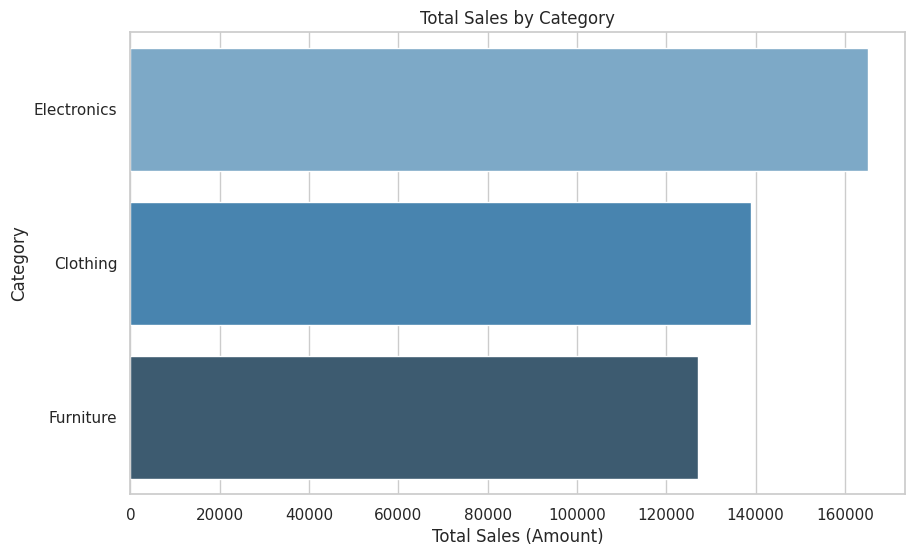

In [ ]:
sns.barplot(data=category_sales, x="Amount", y="Category", hue="Category", palette="Blues_d")
plt.title("Total Sales by Category")
plt.xlabel("Total Sales (Amount)")
plt.ylabel("Category")
plt.show()

**Profit Margin (%) by Category**

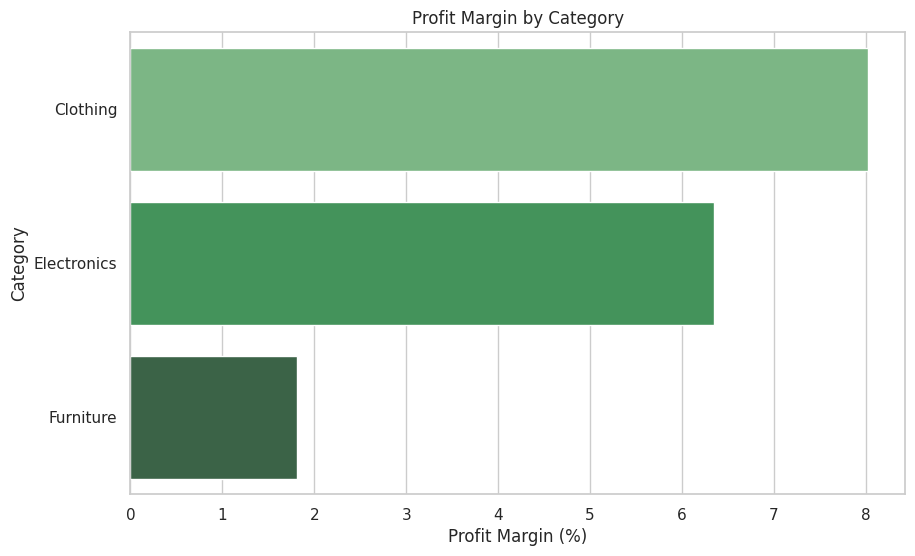

In [ ]:
sns.barplot(data=category_profit.sort_values(by="Profit Margin (%)", ascending=False),
            x="Profit Margin (%)", y="Category", hue="Category", palette="Greens_d")
plt.title("Profit Margin by Category")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Category")
plt.show()

**Average Profit per Order by Category**

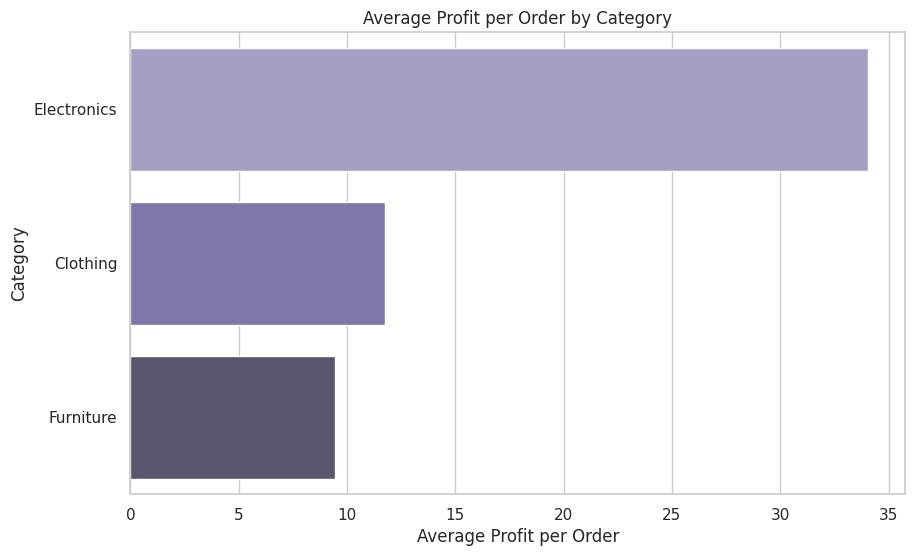

In [ ]:
sns.barplot(data=category_profit.sort_values(by="Average Profit per Order", ascending=False),
            x="Average Profit per Order", y="Category", hue="Category", palette="Purples_d")
plt.title("Average Profit per Order by Category")
plt.xlabel("Average Profit per Order")
plt.ylabel("Category")
plt.show()

### 📊 Category-Level Sales & Profitability Insights

* **Electronics** made the highest sales overall — ₹1,65,267. Even though the profit margin was around **6.35%**, the **average profit per order was ₹34**, which shows that it's profitable even with fewer orders. It's a strong category in terms of both value and profit per sale.

* **Clothing** came second with ₹1,39,054 in sales but had the **highest profit margin** at **8.03%**. The **average profit per order was ₹11.76**, which means this category works well when you have **more volume**. It's a good performer and can be scaled easily.

* **Furniture** was the lowest in sales (₹1,27,181) and also had the **lowest profit margin of 1.81%**. Each order gave only **₹9.45** profit on average. That shows this category isn’t doing great — probably due to **high costs or low pricing**. We need to look into how to improve this or whether it's worth focusing on.

---

### 💡 **My Suggestions:**

* Clothing is doing well — we can run more offers or bundles to increase volume even more.
* Electronics has solid profits per order — we can try to sell more accessories or premium items here.
* Furniture needs improvement — maybe in cost control, delivery, or pricing strategy.


# **Q.1 Part:2**

# Inspect the Sales Target Data

In [ ]:
# Print 5 row Sales Target
print(Target_sales)

   Month of Order Date     Category   Target
0               Apr-18    Furniture  10400.0
1               May-18    Furniture  10500.0
2               Jun-18    Furniture  10600.0
3               Jul-18    Furniture  10800.0
4               Aug-18    Furniture  10900.0
5               Sep-18    Furniture  11000.0
6               Oct-18    Furniture  11100.0
7               Nov-18    Furniture  11300.0
8               Dec-18    Furniture  11400.0
9               Jan-19    Furniture  11500.0
10              Feb-19    Furniture  11600.0
11              Mar-19    Furniture  11800.0
12              Apr-18     Clothing  12000.0
13              May-18     Clothing  12000.0
14              Jun-18     Clothing  12000.0
15              Jul-18     Clothing  14000.0
16              Aug-18     Clothing  14000.0
17              Sep-18     Clothing  14000.0
18              Oct-18     Clothing  16000.0
19              Nov-18     Clothing  16000.0
20              Dec-18     Clothing  16000.0
21        

# Filter for Furniture Category Only

In [ ]:
furniture_target = Target_sales[Target_sales['Category']== "Furniture"].copy()
furniture_target

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0
5,Sep-18,Furniture,11000.0
6,Oct-18,Furniture,11100.0
7,Nov-18,Furniture,11300.0
8,Dec-18,Furniture,11400.0
9,Jan-19,Furniture,11500.0


**Changing Month column Into Date format**

In [ ]:
furniture_target['Month of Order Date'] = pd.to_datetime(furniture_target['Month of Order Date'],format="%b-%y", errors="coerce")

# drop row with invalid date if any
furniture_target = furniture_target.dropna(subset="Month of Order Date")

# sort by datetime
furniture_target = furniture_target.sort_values(by='Month of Order Date')

# format for displying
furniture_target['Month of Order Date'] = furniture_target['Month of Order Date'].dt.strftime("%B %Y")


# Month over Month % changes in Target

In [ ]:
furniture_target['MoM % Change'] = furniture_target['Target'].pct_change() * 100
print(furniture_target[['Month of Order Date','Target','MoM % Change']])

   Month of Order Date   Target  MoM % Change
0           April 2018  10400.0           NaN
1             May 2018  10500.0      0.961538
2            June 2018  10600.0      0.952381
3            July 2018  10800.0      1.886792
4          August 2018  10900.0      0.925926
5       September 2018  11000.0      0.917431
6         October 2018  11100.0      0.909091
7        November 2018  11300.0      1.801802
8        December 2018  11400.0      0.884956
9         January 2019  11500.0      0.877193
10       February 2019  11600.0      0.869565
11          March 2019  11800.0      1.724138


# Visualization of Target Trend

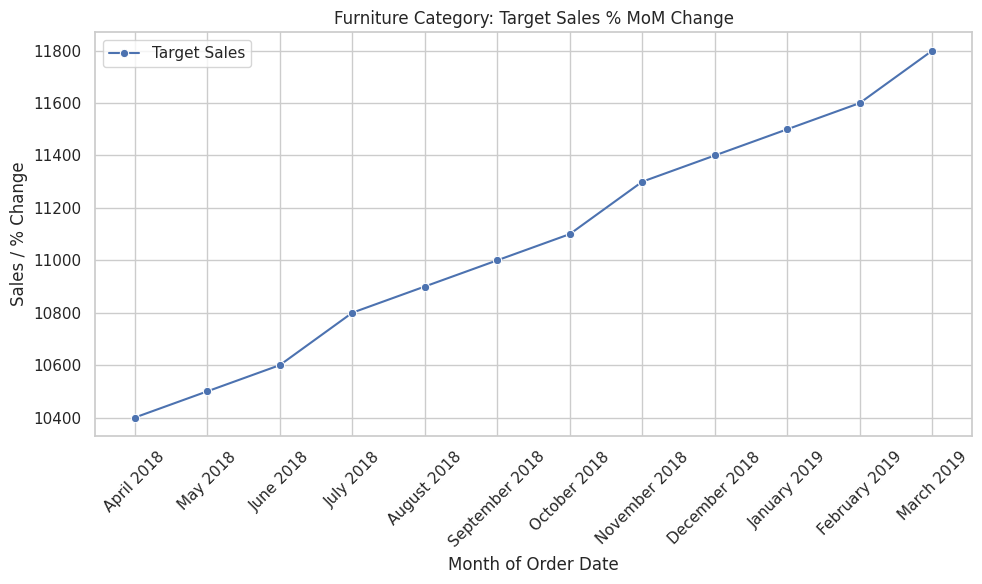

In [ ]:
sns.lineplot(data=furniture_target, x="Month of Order Date", y="Target", marker='o', label="Target Sales")


plt.title("Furniture Category: Target Sales % MoM Change")
plt.xticks(rotation=45)
plt.ylabel("Sales / % Change")
plt.legend()
plt.tight_layout()
plt.show()

### 📈 **Furniture Target Trend Analysis**
* The sales target for **Furniture** category **increased gradually every month** from **April 2018 to March 2019**.
* Most of the month-over-month growth was **less than 1%**, showing a **very stable and consistent target strategy**.
* A few months showed a **slightly higher increase**, like:

  * **July 2018** with a 1.88% increase,
  * **November 2018** with a 1.80% increase, and
  * **March 2019** with a 1.72% increase.
* These small jumps could be linked to **expected festive seasons or end-of-year pushes**.

---

### 💡 **My Suggestions:**

* Since the changes are small, the target planning seems **safe and balanced**, which is good.
* But to get better performance, we can consider:

  * Adding a **slightly bigger push** during **festive months** like Diwali or New Year.
  * Using **historical sales data** to set more dynamic targets instead of flat increases.
* Also, if any month underperforms, we can **adjust the next month’s target** based on that — keeping it more realistic.

# **Q.1 Part:3**

# State Data checking

In [ ]:
print(orders_list.columns)

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category'], dtype='object')


# Top 5 States Order by Count

In [ ]:
top_states = merge_data['State'].value_counts().head()
print("Top States by Order Count")
print(top_states)

Top States by Order Count
State
Madhya Pradesh    340
Maharashtra       290
Gujarat            87
Rajasthan          74
Delhi              74
Name: count, dtype: int64


In [ ]:
# filtering top 5 States
top_states_list = top_states.index.tolist()
top_states_data = merge_data[merge_data['State'].isin(top_states_list)]

# Calculate Sales and Average Profit

In [ ]:
state_analysis = top_states_data.groupby("State").agg({
    "Amount" : "sum",
    "Profit" : ["mean", "sum"],
    "Order ID" : "count"
}).reset_index()

state_analysis.columns= ['State','Total Sales','Avg Profit',"Total Profit",'Order Count']
print("\nState wise Sales and Profit Analysis")
print(state_analysis.sort_values(by="Total Sales", ascending=False))


State wise Sales and Profit Analysis
            State  Total Sales  Avg Profit  Total Profit  Order Count
2  Madhya Pradesh     105140.0   16.326471        5551.0          340
3     Maharashtra      95348.0   21.296552        6176.0          290
0           Delhi      22531.0   40.364865        2987.0           74
4       Rajasthan      21149.0   16.986486        1257.0           74
1         Gujarat      21058.0    5.344828         465.0           87


In [ ]:
print(state_analysis)

            State  Total Sales  Avg Profit  Total Profit  Order Count
0           Delhi      22531.0   40.364865        2987.0           74
1         Gujarat      21058.0    5.344828         465.0           87
2  Madhya Pradesh     105140.0   16.326471        5551.0          340
3     Maharashtra      95348.0   21.296552        6176.0          290
4       Rajasthan      21149.0   16.986486        1257.0           74


# Visualization for Calculate Sales and Average Profit

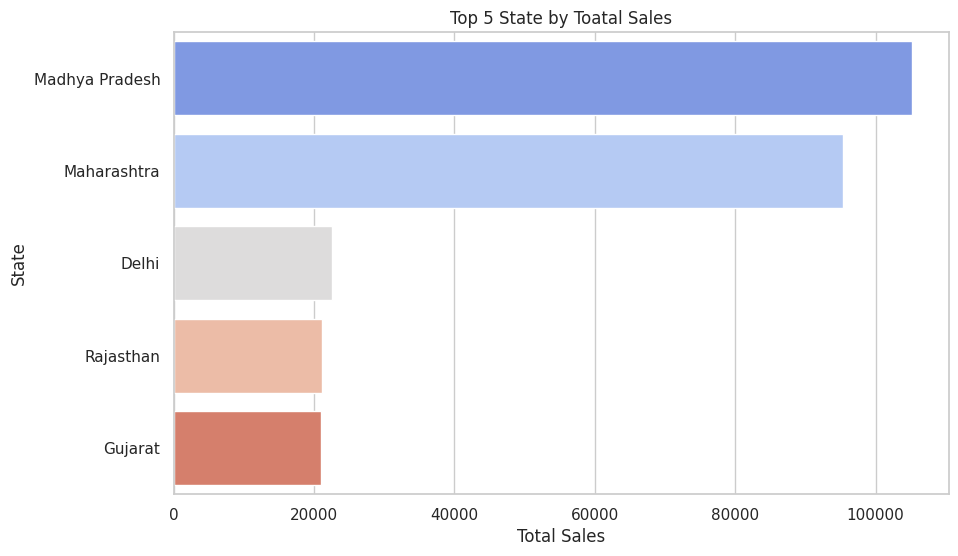

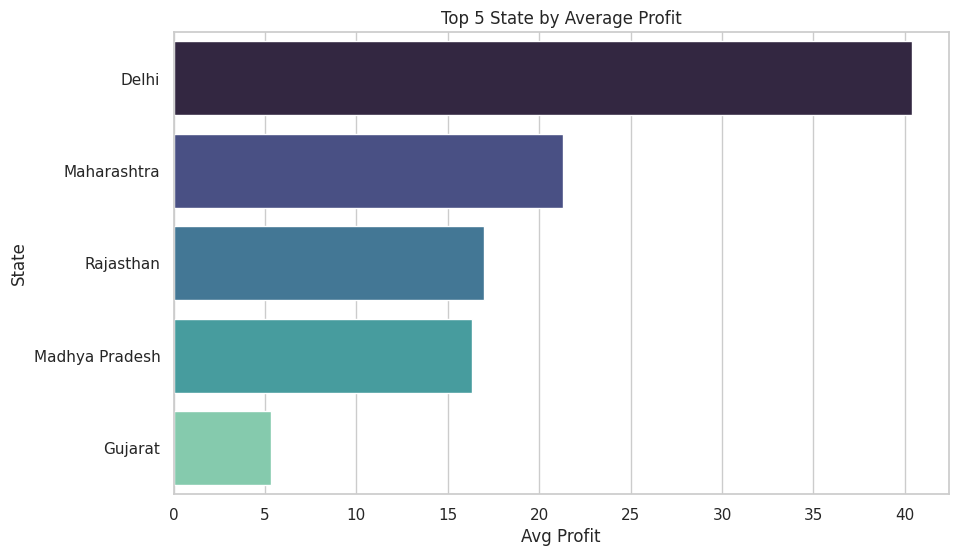

In [ ]:
sns.barplot(data=state_analysis.sort_values(by="Total Sales", ascending=False),
            x="Total Sales", y="State", hue="State", palette="coolwarm")
plt.title("Top 5 State by Toatal Sales")
plt.show()


sns.barplot(data=state_analysis.sort_values(by="Avg Profit", ascending=False),
            x="Avg Profit", y="State", hue="State",palette="mako" )
plt.title("Top 5 State by Average Profit")
plt.show()

### 🌍 **State-wise Sales & Profit Insights**

* **Madhya Pradesh** had the **highest number of orders (340)** and also topped in **total sales** at ₹1,05,140. Its **average profit per order was ₹16.32**, which is decent. This state performs strongly in both volume and revenue.

* **Maharashtra** followed with **290 orders** and ₹95,348 in sales. Interestingly, it had **higher average profit per order (₹21.29)** than Madhya Pradesh. This shows **good customer value** and solid pricing or product mix.

* **Delhi** had only **74 orders**, but its **average profit per order was the highest at ₹40.36**. This means even though volume is low, it's a **high-margin region** — definitely a place to focus on and scale.

* **Rajasthan** and **Gujarat** had similar order counts (74 and 87 respectively), but very different results:

  * Rajasthan had average profit per order of ₹16.98,
  * Gujarat was the **lowest** at just ₹5.34 per order — which shows poor profitability despite decent order numbers.

---

### 💡 **My Suggestions:**

* We should focus more on **Delhi**, as it’s giving the **best profit per order** — maybe try targeted ads or exclusive offers to increase order count there.
* **Madhya Pradesh and Maharashtra** are strong markets — maintain engagement and expand product variety.
* **Gujarat needs improvement** — we can explore if pricing is too low or if high return/cancellation rates are cutting profits.
* Rajasthan is average, but still has potential with a bit of marketing or product mix optimization.


# **Q.2**

# 5 Things Jar App Does Well

**1. Auto-Saving That Feels Effortless**

  Jar smartly rounds up and saves small amounts from my daily transactions without me even noticing—super convenient!

**2.Hassle-Free Sign-Up Process**


   Getting started is really easy—no lengthy forms or confusing steps, which is perfect if you’re new to saving or investing.

**3. Clear & Trustworthy Gold Investment**

The app shows live gold prices and lets me invest small amounts, which makes gold investing feel secure and easy to understand.

**4. Neat and Modern Design**

The interface is clean, minimal, and user-friendly—great for someone like me who appreciates simplicity.

**5. Fun Streaks That Keep Me Motivated**

The daily saving streak feature adds a fun, game-like twist that keeps me consistent and motivated to save every day.



# 5 Things That Could Be Improved

**1. Limited to Just Digital Gold**

Right now, the app only supports digital gold. It would be great to see options like mutual funds or SIPs to give users more investment choices.

**2. No Guidance for Beginners**

There’s not much content for people who are just starting to manage their money. Some simple tips or educational content would really help.

**3. Rewards Feel a Bit Flat**

Even if I save regularly, the rewards don’t feel exciting or motivating enough. A stronger rewards system could boost engagement.

**4. No Option for Group or Family Saving**

The app lacks features for shared savings goals. Adding the ability to save together with friends or family would be a nice touch.

**5. Support Isn’t Always There When Needed**

Customer service isn’t easy to reach. Having an in-app chat or 24/7 support would really improve the user experience.



# **Q.3**

# Future Business Opportunities for Jar

**1. Recurring Mutual Fund SIPs**



*   Tap into retail investing.
*   Keep automation theme: auto-invest from small daily spends.





**2. Micro-loans for Emergency Needs**

*        Instant small loans backed by gold savings as       collateral.

*    Helps user retention + trust.

**3. Automated Bill Payments**

*  Save for bills daily and pay via app.

*  Reduces last-minute stress.

**4. Personal Finance Dashboard**

* Auto-track spends, budgets, and saving patterns.

* Great for financial literacy.

**4. Family or Group Goals**

* Save with friends/family (like wedding, travel goals).

* Encourages referrals and engagement.

# How to Leverage Strengths

| Jar Strength               | Strategy                                              |
| -------------------------- | ----------------------------------------------------- |
| **Automation**             | Extend it to SIPs, bill saving, recurring investments |
| **User-friendly UI**       | Keep it simple even when adding features              |
| **Trust/Credibility**      | Build on gold success to offer more regulated assets  |
| **Daily Habit-Forming UX** | Use gamification for new features (e.g., SIP streaks) |
